In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import acquire as acq
import prep
import graphviz
from env import get_db_url
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


### Using the titanic data:

What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [32]:
titanic_df = acq.get_titanic_data()
titanic_df_clean, train, validate, test = prep.prep_titanic(titanic_df)
train.info()


Reading from CSV file...
Reading from CSV file...
<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 850 to 421
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 498 non-null    int64  
 1   pclass                   498 non-null    int64  
 2   sibsp                    498 non-null    int64  
 3   parch                    498 non-null    int64  
 4   fare                     498 non-null    float64
 5   alone                    498 non-null    int64  
 6   sex_male                 498 non-null    uint8  
 7   embark_town_Queenstown   498 non-null    uint8  
 8   embark_town_Southampton  498 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 28.7 KB


In [33]:
validate.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 307 to 607
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 214 non-null    int64  
 1   pclass                   214 non-null    int64  
 2   sibsp                    214 non-null    int64  
 3   parch                    214 non-null    int64  
 4   fare                     214 non-null    float64
 5   alone                    214 non-null    int64  
 6   sex_male                 214 non-null    uint8  
 7   embark_town_Queenstown   214 non-null    uint8  
 8   embark_town_Southampton  214 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 12.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 545 to 613
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived            

Tree building first, then... Idk

In [35]:
X_train = train.drop(columns= ['survived'])
y_train = train.survived

X_validate = validate.drop(columns= ['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

clf = DecisionTreeClassifier(max_depth=3, random_state=302)
clf.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=3, random_state=302)

In [30]:
X_train.head()

,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
850,3,4,2,31.2750,0,1,0,1
716,1,0,0,227.5250,1,0,0,0
883,2,0,0,10.5000,1,1,0,1
486,1,1,0,90.0000,0,0,0,1
329,1,0,1,57.9792,0,0,0,0


[Text(334.8, 332.955, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]'),
 Text(167.4, 237.825, 'pclass <= 2.5\ngini = 0.392\nsamples = 179\nvalue = [48, 131]'),
 Text(83.7, 142.695, 'fare <= 149.035\ngini = 0.118\nsamples = 95\nvalue = [6, 89]'),
 Text(41.85, 47.565, 'gini = 0.093\nsamples = 82\nvalue = [4, 78]'),
 Text(125.55000000000001, 47.565, 'gini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(251.10000000000002, 142.695, 'parch <= 0.5\ngini = 0.5\nsamples = 84\nvalue = [42, 42]'),
 Text(209.25, 47.565, 'gini = 0.457\nsamples = 51\nvalue = [18, 33]'),
 Text(292.95, 47.565, 'gini = 0.397\nsamples = 33\nvalue = [24, 9]'),
 Text(502.20000000000005, 237.825, 'fare <= 15.173\ngini = 0.305\nsamples = 319\nvalue = [259, 60]'),
 Text(418.5, 142.695, 'fare <= 13.25\ngini = 0.204\nsamples = 200\nvalue = [177, 23]'),
 Text(376.65000000000003, 47.565, 'gini = 0.213\nsamples = 190\nvalue = [167, 23]'),
 Text(460.35, 47.565, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text

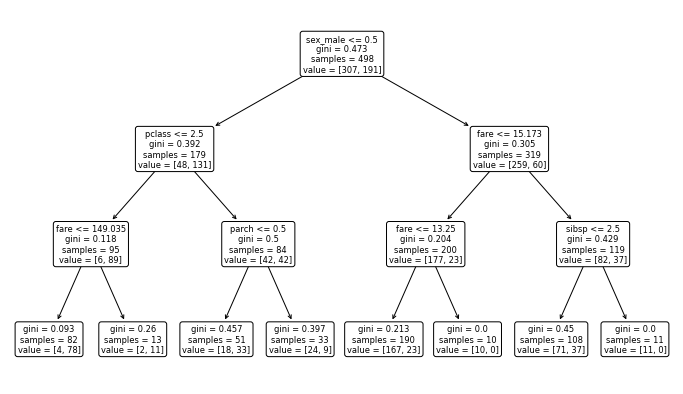

In [41]:
X_train[['pclass', 'sibsp', 'parch','alone']].head()

select_x_cols = ['pclass', 'sibsp', 'parch','alone']
X_train[select_x_cols]

plt.figure(figsize=(12, 7))
plot_tree(clf, feature_names=X_train.columns, rounded=True)

In [43]:
import sklearn.tree

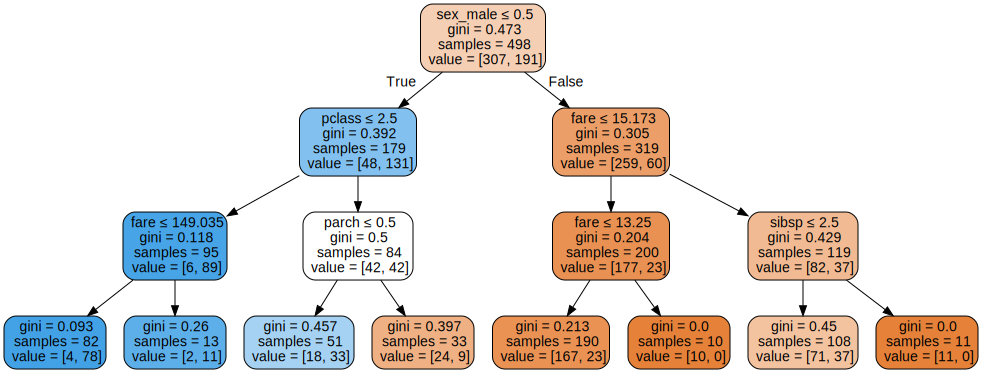

In [47]:
titan_data = sklearn.tree.export_graphviz(clf, feature_names= X_train.columns,
    filled= True, rounded= True, 
    special_characters= True)
graph = graphviz.Source(titan_data)
graph